In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [71]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Visualizing an image data set sample

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


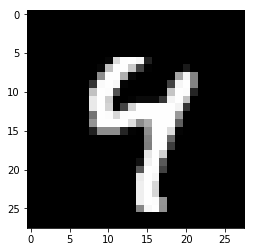

In [72]:
img = mnist.train.images[2]
label = mnist.train.labels[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
print(label)

Defining the network 

In [99]:
def conv_net(inputs):
    conv = tf.layers.conv2d(inputs, 16, (3,3), padding='same', activation=tf.nn.relu)
    
    conv = tf.layers.max_pooling2d(conv, 16, (2,2), padding='same')
    
    conv = tf.layers.conv2d(inputs, 8, (3,3), padding='same', activation=tf.nn.relu)

    conv = tf.layers.max_pooling2d(conv, 8, (2,2), padding='same')
        
    conv = tf.layers.conv2d(inputs, 4, (3,3), padding='same', activation=tf.nn.relu)

    conv = tf.layers.max_pooling2d(conv, 4, (2,2), padding='same')
    
    conv = tf.contrib.layers.flatten(conv)
    
    conv = tf.contrib.layers.fully_connected(conv, 10)
    
    return conv

In [100]:
inputs_ = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name='inputs')
targets_ = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='targets')

#Building the network

logits = conv_net(inputs_)

logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=targets_))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(targets_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Network training hyper parameters

In [101]:
epochs = 60
batch_size = 256

Training network

In [102]:
#Training helper functions    

def train_neural_network(session, optimizer, feature_batch, label_batch):
    session.run(optimizer, feed_dict={
        inputs_: feature_batch,
        targets_: label_batch,
        keep_prob: keep_probability 
    })
    
def print_training_stats(session, epoch, batch_i, feature_batch, label_batch, validation_feature, validation_label, cost, accuracy):
    loss = sess.run(cost, feed_dict={
                inputs_: feature_batch,
                targets_: label_batch})
    validation_accuracy = sess.run(accuracy, feed_dict={
                inputs_: validation_feature,
                targets_: validation_label })
    print('Epoch {:>2}, MNIST Batch {}: Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(epoch + 1, batch_i, loss, validation_accuracy))
    

In [103]:
save_model_path = './network_model'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            batch_features = batch[0].reshape((-1, 28, 28, 1))
            batch_labels = batch[1]
            train_neural_network(sess, optimizer, batch_features, batch_labels)
            
            print_training_stats(sess, epoch, i, 
                                 batch_features, batch_labels, 
                                 mnist.validation.images.reshape((-1, 28, 28, 1)), mnist.validation.labels,
                                 cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, MNIST Batch 0: Loss:     2.2739 Validation Accuracy: 0.138600
Epoch  1, MNIST Batch 1: Loss:     2.2557 Validation Accuracy: 0.159800
Epoch  1, MNIST Batch 2: Loss:     2.2157 Validation Accuracy: 0.180400
Epoch  1, MNIST Batch 3: Loss:     2.2235 Validation Accuracy: 0.209600
Epoch  1, MNIST Batch 4: Loss:     2.1742 Validation Accuracy: 0.243200
Epoch  1, MNIST Batch 5: Loss:     2.1860 Validation Accuracy: 0.285800
Epoch  1, MNIST Batch 6: Loss:     2.1483 Validation Accuracy: 0.324400
Epoch  1, MNIST Batch 7: Loss:     2.1285 Validation Accuracy: 0.362800
Epoch  1, MNIST Batch 8: Loss:     2.1259 Validation Accuracy: 0.397600
Epoch  1, MNIST Batch 9: Loss:     2.1217 Validation Accuracy: 0.426200
Epoch  1, MNIST Batch 10: Loss:     2.0699 Validation Accuracy: 0.457600
Epoch  1, MNIST Batch 11: Loss:     2.0291 Validation Accuracy: 0.485400
Epoch  1, MNIST Batch 12: Loss:     2.0106 Validation Accuracy: 0.506200
Epoch  1, MNIST Batch 13: Loss:     1.9947 Valida

KeyboardInterrupt: 